In [1]:
# Imports and required packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px
import statsmodels
import warnings
warnings.filterwarnings("ignore",category=plt.cbook.mplDeprecation)

plt.rcParams["figure.figsize"] = (14,7)
sns.set_theme(style="whitegrid")

In [2]:
# Data
# Source: https://www.kaggle.com/rdoume/beerreviews
df = pd.read_csv(r"beer_reviews.csv")

# Data shape and number of unique values per column
print(df.shape)
print(df.nunique())

(1586614, 13)
brewery_id               5840
brewery_name             5742
review_time           1577960
review_overall             10
review_aroma                9
review_appearance          10
review_profilename      33387
beer_style                104
review_palate               9
review_taste                9
beer_name               56857
beer_abv                  530
beer_beerid             66055
dtype: int64


In [3]:
# Check for null values
print(df.isnull().sum())

# Drop null row values
df = df.dropna()

# Percent of data missing `beer_abv` values, having the highest null count
print("\nPercent Null Values of `beer_abv` column:", round(67785 / 1586614 * 100, 2),"%")

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

Percent Null Values of `beer_abv` column: 4.27 %


In [4]:
# check for same user review for a beer
dfrows = df.shape[0]
df = df.sort_values('review_overall', ascending=False)
# Keep the highest rating from each user and drop the rest 
df = df.drop_duplicates(subset= ['review_profilename','beer_name'], keep='first')
# Percent of data that are duplicates
print("Percent of Duplicate Values:", round((dfrows - df.shape[0])/ dfrows * 100, 2),"%")

Percent of Duplicate Values: 1.46 %


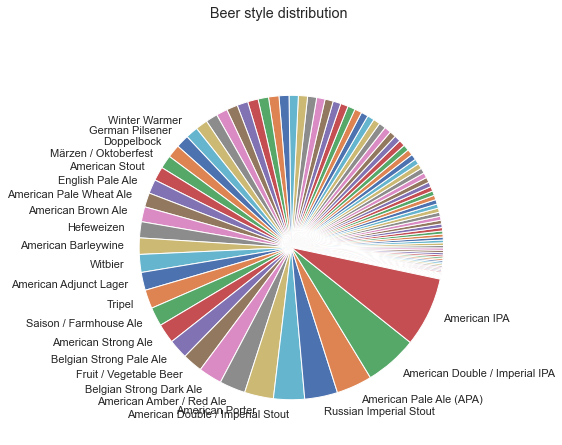

In [5]:
# Beer style distribution
tempC = Counter(df['beer_style'])
tempC = sorted(tempC.items(), key=lambda x:x[1])
sortedC = dict(tempC)
labels = []
for i in sortedC:
    if sortedC[i] < 19354 :
        labels.extend([""])
    else:
        labels.extend([i])
#labels = (list(sortedC.keys()))
#labels.extend([""]* 84)
df['review_profilename'] = df['review_profilename'].factorize()[0]
histplot = plt.pie(sortedC.values(), startangle=348, labels=labels)

plt.suptitle('Beer style distribution')
plt.show()

.יש פיזור סגנונות, ואין סגנון אחד אשר לוקח חלק גדול מדי




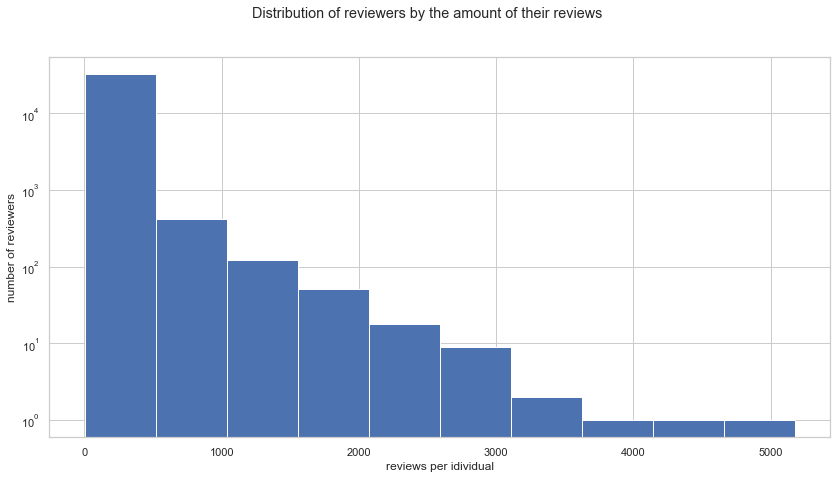

In [6]:
# Distribution of reviewers by the amount of contributed reviews
histplot = plt.hist(Counter(df['review_profilename']).values(),stacked=True)
plt.yscale('log')
plt.ylabel('number of reviewers')
plt.xlabel('reviews per idividual')

plt.suptitle('Distribution of reviewers by the amount of their reviews')
plt.show()

.נראה כי רוב היוזרים סיפקו בסביבות ה10 ביקורות ומעט יוזרים סיפקו כמות גדולה של ביקורות 
.נסיק כי זה משקף פיזור ריאליסטי של אדם שמספק ביקורות על בירות, רוב האנשים יביאו ביקורת על כמות בירות קטנה ומעט אנשים (אשר מתעניינים בבירה) יוכלו להביא יותר ביקורות




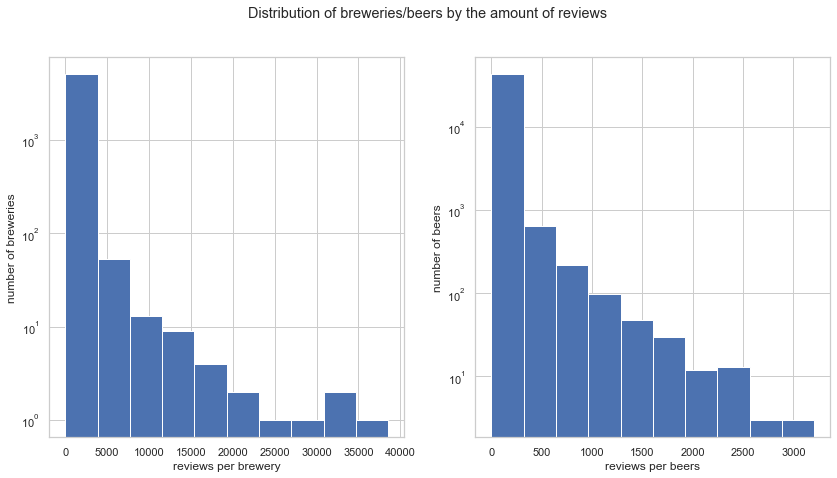

In [7]:
# Distribution of beers/breweries by the amount of reviews
f, ax = plt.subplots( 1, 2)
plt.setp(ax, ylabel=('number of reviews'))

# Breweries plot
ax[0].hist(Counter(df['brewery_name']).values(), stacked=True)
ax[0].set_yscale('log')
ax[0].set_xlabel('reviews per brewery')
ax[0].set_ylabel('number of breweries')

# Beers plot
ax[1].hist(Counter(df['beer_name']).values(),stacked=True)
ax[1].set_yscale('log')
ax[1].set_xlabel('reviews per beers')
ax[1].set_ylabel('number of beers')

plt.suptitle('Distribution of breweries/beers by the amount of reviews')
plt.show()

.נראה כי יש מעט בירות ומבשלות אשר יש להן כמות ביקורות גדולה, כנראה מותגים ידועים או נגישים יותר




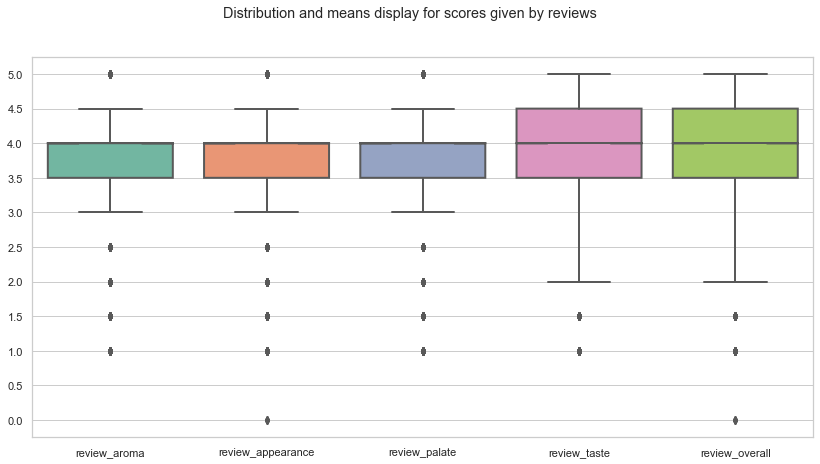

In [8]:
# # Distribution and means display for scores given by reviews
ax = sns.boxplot(data=df[['review_aroma','review_appearance','review_palate','review_taste','review_overall']], palette="Set2", linewidth=2, notch=True)
ax.set_yticks(np.arange(0, 5.25, 0.5))

plt.suptitle('Distribution and means display for scores given by reviews')
plt.show()

.נראה כי הדירוגים מתרכזים סביב דירוג 4 בכל הקטגוריות, אם כי יש דירוגים של 0 או 1 בכלל הקטגוריות




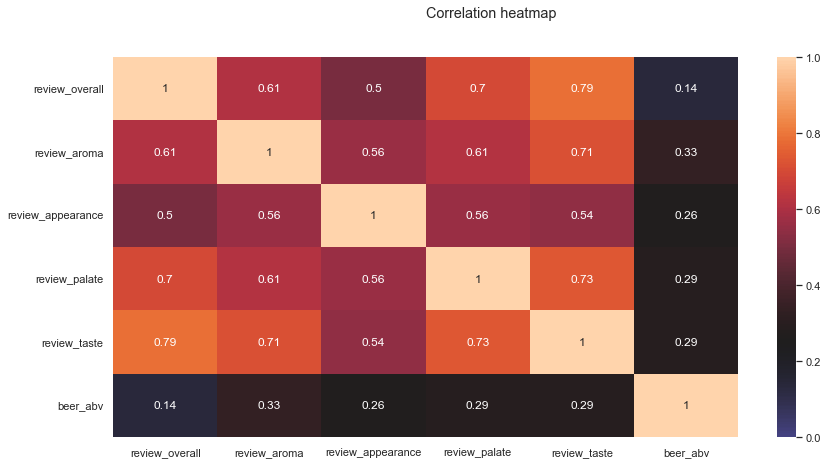

In [9]:
# Correlation between every category including beer ABV and overall score
axislabels = ['review overall', 'review aroma', 'review appearance', 'review palate', 'review taste', 'beer ABV']
ax = sns.heatmap( df[ [ 'review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv' ] ].corr(), center= 0.25, vmin = 0, vmax = 1, annot=True)

plt.suptitle( "Correlation heatmap" )
plt.show()

.גרף זה מראה לנו את היחס בין כל זוג קטגוריות
נראה שמקבלים קשר חזק יותר עבור קטוגוריות של טעם, תוצאה שהינו מצפים שתתקבל
.לעומת זאת, הקשר בין אחוזי האלכוהול לדירוג הסופי הינו קטן מאוד וזוהי תוצאה שאינה נובעת מהיגיון או אפילו סותרת אותו




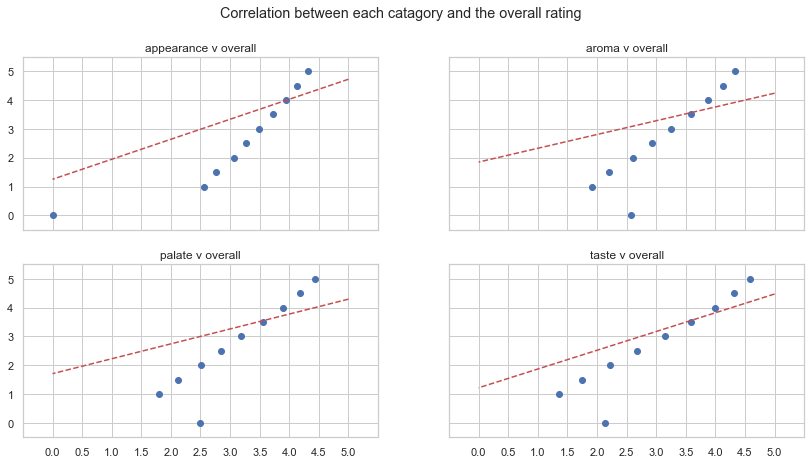

In [10]:
# Correlation between each catagory and the overall rating
overall_means = df.loc[:,['review_aroma','review_appearance','review_palate','review_taste','review_overall']]
overall_means = overall_means.groupby('review_overall').mean()
overall_means = pd.DataFrame(data=overall_means)
overall_means = overall_means.sort_values(by=['review_overall'],ascending=False).reset_index()
overall = overall_means["review_overall"]

f, ax = plt.subplots( 2, 2, sharex = 'col', sharey = 'row', figsize = ( 14, 7 ) )
plt.setp(ax, xlim=(-0.5,5.5), ylim=(-0.5,5.5), xticks=([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]), yticks=([0,1,2,3,4,5]))

# Appearance plot
ax[0][0].scatter(x="review_appearance",y="review_overall", data=overall_means,)
z = np.polyfit(overall, overall_means["review_appearance"] ,1)
p = np.poly1d(z)
ax[0][0].plot(overall,p(overall),"r--")
ax[0][0].set_title( 'appearance v overall' )

# aroma plot
ax[0][1].scatter(x="review_aroma",y="review_overall", data=overall_means,)
z = np.polyfit(overall, overall_means["review_aroma"] ,1)
p = np.poly1d(z)
ax[0][1].plot(overall,p(overall),"r--")
ax[0][1].set_title( 'aroma v overall' )

# palate plot
ax[1][0].scatter(x="review_palate",y="review_overall", data=overall_means,)
z = np.polyfit(overall, overall_means["review_palate"] ,1)
p = np.poly1d(z)
ax[1][0].plot(overall,p(overall),"r--")
ax[1][0].set_title( 'palate v overall' )

# taste plot
ax[1][1].scatter(x="review_taste",y="review_overall", data=overall_means,)
z = np.polyfit(overall, overall_means["review_taste"] ,1)
p = np.poly1d(z)
ax[1][1].plot(overall,p(overall),"r--")
ax[1][1].set_title( 'taste v overall' )

plt.suptitle( "Correlation between each catagory and the overall rating" )
plt.show()

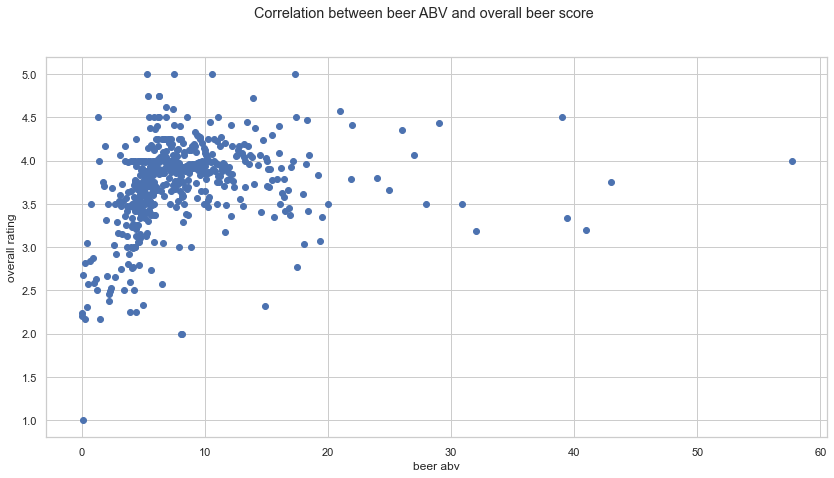

In [11]:
# Correlation between beer ABV and overall beer score
abv_overall = df.loc[:,['beer_abv','review_overall']]
abv_overall = abv_overall.groupby('beer_abv').mean()
abv_overall = pd.DataFrame(data=abv_overall)
abv_overall = abv_overall.sort_values(by=['beer_abv'],ascending=False).reset_index()
plt.scatter(abv_overall['beer_abv'],abv_overall['review_overall'])
plt.xlabel('beer abv')
plt.ylabel('overall rating')

plt.suptitle('Correlation between beer ABV and overall beer score')
plt.show()

.פיזור של אחוזי אלכוהול של בירה לעומת הדירוג הסופי שקיבלה
.לא ניתן לקבל תשובה חד משמעית מהגרף בלבד


